In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Correlation

In [2]:
hybrid = Table.read_table('http://inferentialthinking.com/notebooks/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


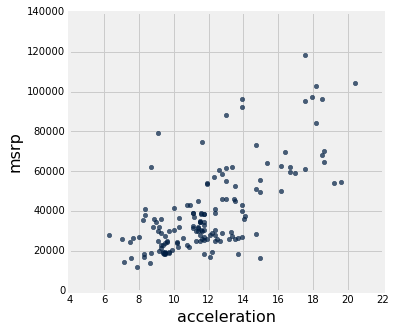

In [3]:
hybrid.scatter('acceleration', 'msrp')

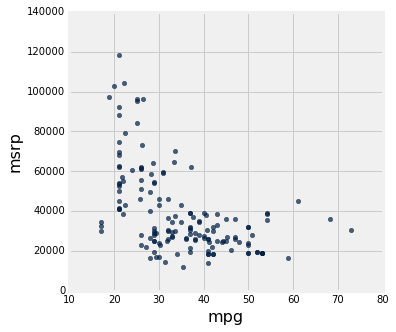

In [4]:
hybrid.scatter('mpg', 'msrp')

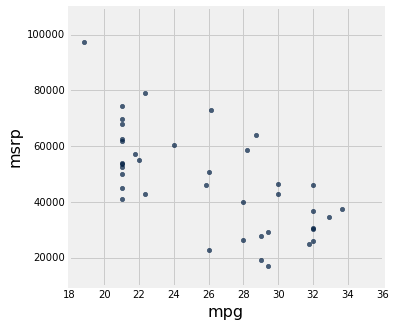

In [5]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

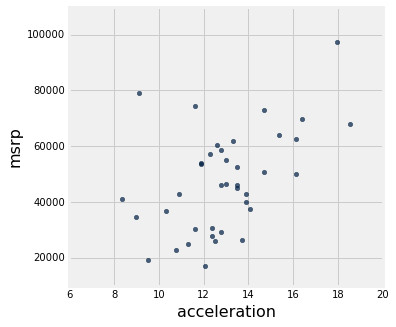

In [6]:
suv.scatter('acceleration', 'msrp')

In [7]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

In [8]:
msrp = suv.column('msrp')
standard_units(msrp)

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

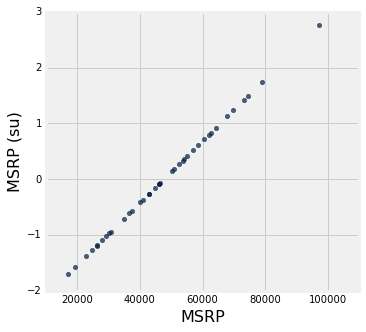

In [9]:
Table().with_columns(
    'MSRP', msrp,
    'MSRP (su)', standard_units(msrp)
).scatter(0, 1)

In [10]:
np.count_nonzero(standard_units(msrp) > 0) / len(msrp)

0.46153846153846156

In [11]:
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

standardize(suv.select('mpg', 'msrp'))

mpg (su),msrp (su)
1.31784,-0.60884
0.48955,0.605991
0.747288,-1.02536
0.659172,-1.57389
1.52491,-0.714707
-0.805749,-0.261367
-0.0303321,-0.0775641
1.26497,-1.26796
-0.931314,0.526671
-0.00169453,-1.37281


(-3, 3)

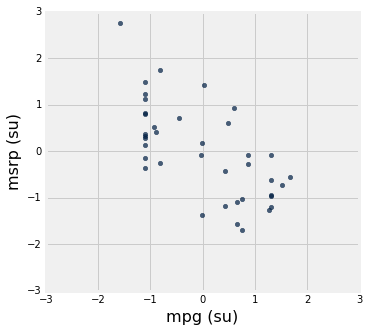

In [12]:
standardize(suv.select('mpg', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3, 3)

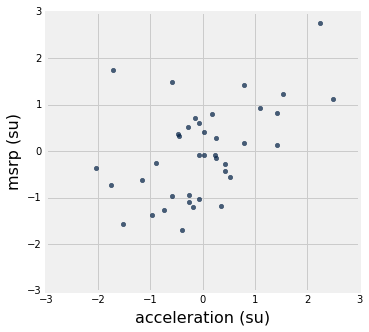

In [13]:
standardize(suv.select('acceleration', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

## Visualizing Correlations

In [2]:
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

In [3]:
_ = interact(r_scatter, r=(-1, 1, 0.1))

## Calculating r

In [22]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


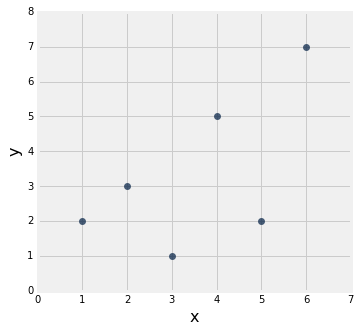

In [23]:
t.scatter(0, 1, s=40)

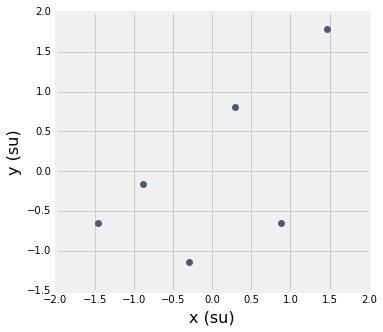

In [24]:
standardize(t).scatter(0, 1, s=40)

In [25]:
su_products = standard_units(t.column('x')) * standard_units(t.column('y'))

In [26]:
standardize(t).with_column('product', su_products)

x (su),y (su),product
-1.46385,-0.648886,0.949871
-0.87831,-0.162221,0.142481
-0.29277,-1.13555,0.332455
0.29277,0.811107,0.237468
0.87831,-0.648886,-0.569923
1.46385,1.78444,2.61215


In [27]:
np.mean(su_products)

0.61741639718977093

In [28]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

correlation(t, 'x', 'y')

0.61741639718977093

In [29]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

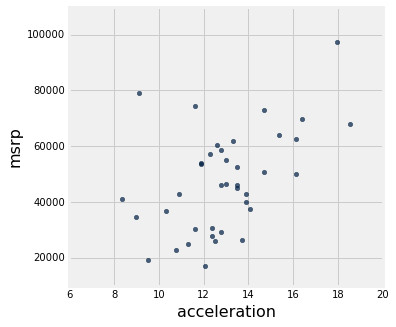

In [30]:
suv.scatter('acceleration', 'msrp')

In [31]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

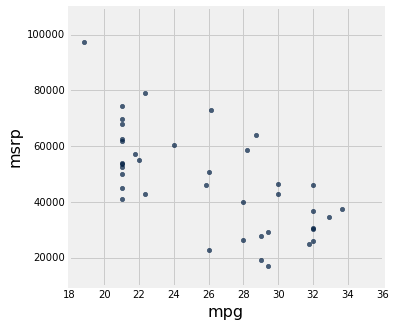

In [32]:
suv.scatter('mpg', 'msrp')

In [33]:
correlation(suv, 'msrp', 'mpg')

-0.6667143635709919

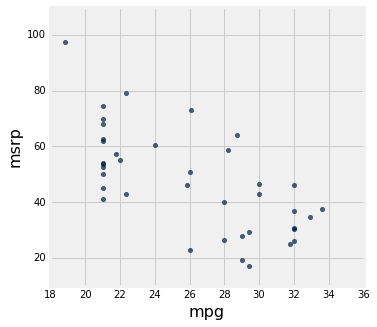

In [34]:
suv_thousands = suv.with_column('msrp', suv.column('msrp') / 1000)
suv_thousands.scatter('mpg', 'msrp')

In [35]:
correlation(suv_thousands, 'mpg', 'msrp')

-0.6667143635709919